In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I2 = np.eye(2, dtype = complex)

# Parameters
m = 1
Nk = 201
kys =np.linspace(-np.pi, np.pi, Nk)
L = 30 # Open in x-direction
B = 2*np.pi/L # Magnetic field

# electron charge is assumed to be 1 and ignored

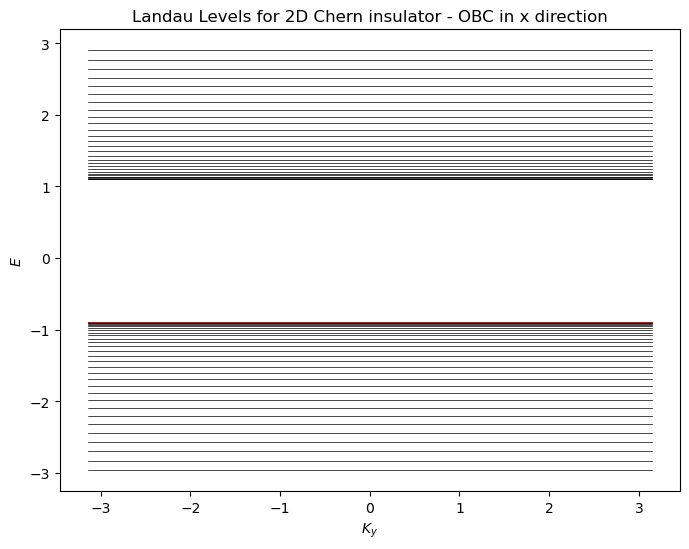

In [6]:
eigvals_oc_vs_ky = []

for ky in kys:
    H_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        H0 = np.sin(ky+B*i) * sigma_y + (m - np.cos(ky+B*i)) * sigma_z
        V = (1j / 2) * sigma_x - (1 / 2) * sigma_z 
        H_open[2*i:2*i+2, 2*i:2*i+2] = H0
        if i < L-1:
            H_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V
            H_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V.conj().T
        else:
            H_open[2*i:2*i+2, 0:2] = V
            H_open[0:2, 2*i:2*i+2] = V.conj().T
    eigenvals_oc, eigenvecs_oc = np.linalg.eigh(H_open)
    eigvals_oc_vs_ky.append(eigenvals_oc)

eigvals_oc_vs_ky = np.array(eigvals_oc_vs_ky).T

# Plot

fig, ax = plt.subplots(figsize=(8,6))
for band in eigvals_oc_vs_ky:
    ax.plot (kys, band,  color='black', linewidth=0.5)
ax.set_xlabel ('$K_y$')
ax.set_ylabel ('$E$')
ax.set_title ('Landau Levels for 2D Chern insulator - OBC in x direction')

# Uncomment the following line to zoom in the lowest LL
#ax.set_ylim (0.89,1.2)

# Highlight Lowest LLs
mid = L
for b in [mid-1, mid]:
    plt.plot(kys, eigvals_oc_vs_ky[b], color='red', linewidth =0.5)

plt.show()
